# Libaries

In [2316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data

In [2317]:
# Importing data

camp = pd.read_csv('../Data/campaigns.csv', sep=';')
donors = pd.read_csv('../Data/donors.csv', sep=',')
gifts = pd.read_csv('../Data/gifts.csv', sep=',')
sc6 = pd.read_csv('../Data/selection campaign 6169.csv')
sc7 = pd.read_csv('../Data/selection campaign 7244.csv')

# References

In [2318]:
rd1 = pd.to_datetime('2018-09-04') # date of 6169 campaign
rd2 = pd.to_datetime('2019-06-18') # date of 7244 campaign

# I/ Data description + Cleaning

## 1) Campaign

### General inspection

In [2319]:
# Displaying the campaign table
camp.head()

,campaignID,date,lettersSent,CostUnit
0,153,13/12/2004,6 873,"0,17 €"
1,154,01/01/2005,7 656,"0,30 €"
2,180,18/01/2005,9 933,"0,20 €"
3,433,29/01/2005,7 448,"0,59 €"
4,476,12/02/2005,6 605,"0,51 €"


In [2320]:
# Displaying information
camp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   campaignID   367 non-null    int64 
 1   date         367 non-null    object
 2   lettersSent  367 non-null    object
 3   CostUnit     367 non-null    object
dtypes: int64(1), object(3)
memory usage: 11.6+ KB


### Missing values and outliers

In [2321]:
# Convert date to datetime
camp['date'] = pd.to_datetime(camp['date'])

C:\Users\Source\AppData\Local\Temp\ipykernel_33028\4099330542.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  camp['date'] = pd.to_datetime(camp['date'])


In [2322]:
# Convert the letterSent and cost per unit to a number
# To find outliers, we need to convert columns to integer before
camp['lettersSent'] = (
    camp['lettersSent']
        .astype(str)
        .str.replace(r'\D+', '', regex=True)
        .astype(int)
)

camp['CostUnit'] = (
    camp['CostUnit']
        .astype(str)
        .str.replace(r'[^0-9,.-]', '', regex=True)
        .str.replace(',', '.', regex=False)
        .astype(float)
)
camp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   campaignID   367 non-null    int64         
 1   date         367 non-null    datetime64[ns]
 2   lettersSent  367 non-null    int64         
 3   CostUnit     367 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 11.6 KB


In [2323]:
# Looking for missing values
print('Missing values per column:')
print('---------------------------------')
print(camp.isna().sum())
print('---------------------------------')
print(f'The data shows {camp.isna().sum().sum()} missing values')

Missing values per column:
---------------------------------
campaignID     0
date           0
lettersSent    0
CostUnit       0
dtype: int64
---------------------------------
The data shows 0 missing values


In [2324]:
# Finding outliers (using only the numerical columns)
num_cols = camp.select_dtypes(include=['float', 'int']).columns

lower = camp[num_cols].quantile(0.01)
upper = camp[num_cols].quantile(0.99)

# printing the results
print(lower)
print(upper)

campaignID      461.38
lettersSent    5243.66
CostUnit          0.02
Name: 0.01, dtype: float64
campaignID      7497.06
lettersSent    47746.96
CostUnit           0.61
Name: 0.99, dtype: float64


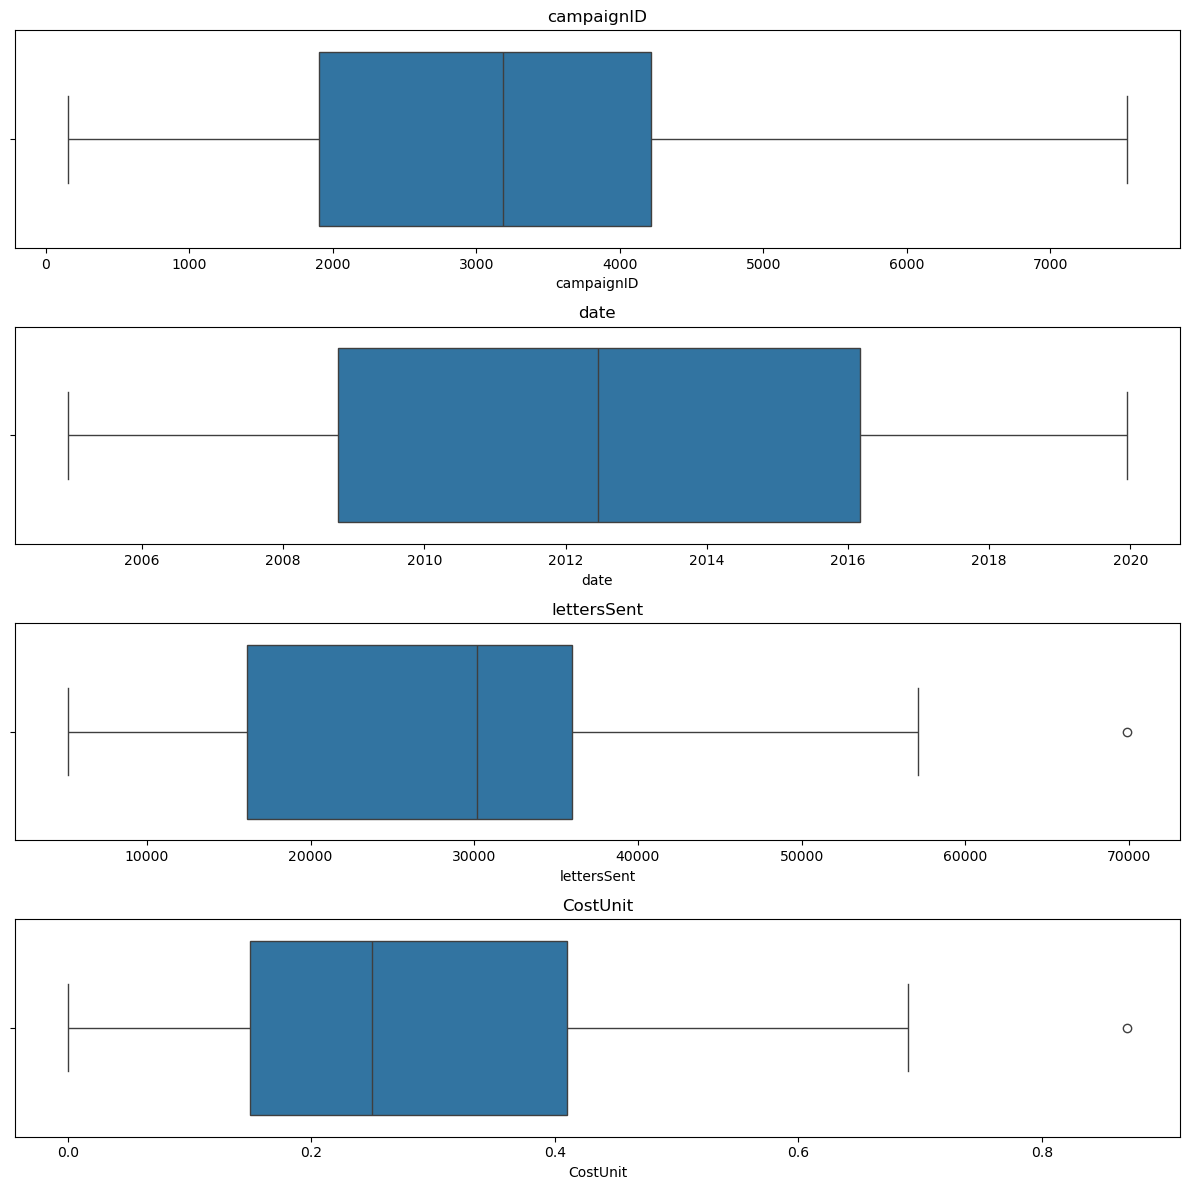

In [2325]:
# Verifying outliers
cols = camp.columns

fig, ax = plt.subplots(nrows=len(cols), ncols=1, figsize=(12, 12))

for i, col in enumerate(cols):
    sns.boxplot(ax=ax[i], x=camp[col])
    ax[i].set_title(col)

plt.tight_layout()
plt.show()

In [2326]:
# Replace lower and upper values by the value of bottom 1% and top 99% (winsorization)
camp = camp.copy()
camp[num_cols] = camp[num_cols].clip(lower=lower, upper=upper, axis=1)

In [2327]:
# Verifying winsorization worked
for col in num_cols:
    print(col, 'min :', round(camp[col].min(),2))
    print(col, 'max :', round(camp[col].max(),2))

campaignID min : 461.38
campaignID max : 7497.06
lettersSent min : 5243.66
lettersSent max : 47746.96
CostUnit min : 0.02
CostUnit max : 0.61


In [2328]:
camp.head(2)

,campaignID,date,lettersSent,CostUnit
0,461.38,2004-12-13,6873.0,0.17
1,461.38,2005-01-01,7656.0,0.30


## 2) Donors

### General inspection

In [2329]:
# Displaying the donors table
donors.head()

,donorID,zipcode,province,region,gender,language,dateOfBirth
0,D100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967
1,D100002,2260.0,Antwerp,Flanders,M,NL,01/14/1952
2,D100003,1780.0,Flemish Brabant,Flanders,M,NL,12/23/1986
3,D100004,1020.0,Brussels,Brussels,F,FR,03/29/1952
4,D100005,1020.0,Brussels,Brussels,F,FR,06/25/1986


In [2330]:
donors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   donorID      44691 non-null  object 
 1   zipcode      44689 non-null  float64
 2   province     44691 non-null  object 
 3   region       44691 non-null  object 
 4   gender       44659 non-null  object 
 5   language     44691 non-null  object 
 6   dateOfBirth  44691 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.4+ MB


### Missing values and outliers

In [2331]:
# Convert date to datetime
donors['dateOfBirth'] = pd.to_datetime(donors['dateOfBirth'])

In [2332]:
# Looking for missing values
print('Missing values per column:')
print('---------------------------------')
print(donors.isna().sum())
print('---------------------------------')
print(f'The data shows {donors.isna().sum().sum()} missing values')

Missing values per column:
---------------------------------
donorID         0
zipcode         2
province        0
region          0
gender         32
language        0
dateOfBirth     0
dtype: int64
---------------------------------
The data shows 34 missing values


In [2333]:
# Handling missing values

# zipcode
donors = donors.dropna(subset=['zipcode']) # since it represents only two observation and there is no other logical way to inpute

# gender
gender_mode = donors['gender'].mode()[0]
donors['gender'] = donors['gender'].fillna(value=gender_mode) #filling by the mode seems relevant for this amount of data (32 out of 44 689 clients)

print(f'The data shows {donors.isna().sum().sum()} missing values now')

The data shows 0 missing values now


In [2334]:
# Checking that there are indeed 44 689 different clients
donors['donorID'].nunique()

44689

In [2335]:
# Convert zipcode to a number
# To find outliers, we need to convert columns to integer before
donors['zipcode'] = donors['zipcode'].astype(int)

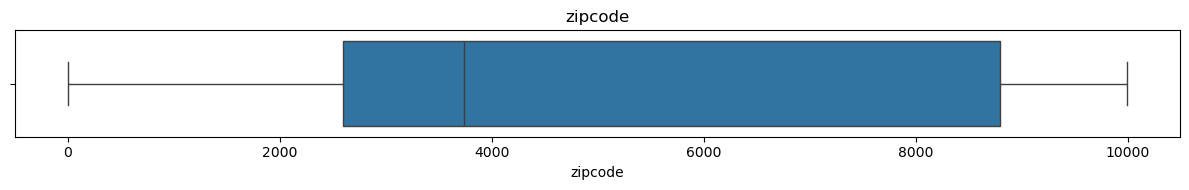

In [2336]:
# Verifying outliers
col = 'zipcode'

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 2))
sns.boxplot(x=donors[col], ax=ax)
ax.set_title(col)

plt.tight_layout()
plt.show()

In [2337]:
# There is no outlier accoring to the graph

In [2338]:
donors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44689 entries, 0 to 44690
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   donorID      44689 non-null  object        
 1   zipcode      44689 non-null  int64         
 2   province     44689 non-null  object        
 3   region       44689 non-null  object        
 4   gender       44689 non-null  object        
 5   language     44689 non-null  object        
 6   dateOfBirth  44689 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 2.7+ MB


In [2339]:
donors.head(2)

,donorID,zipcode,province,region,gender,language,dateOfBirth
0,D100001,1861,Flemish Brabant,Flanders,F,NL,1967-12-24
1,D100002,2260,Antwerp,Flanders,M,NL,1952-01-14


## 3) Gifts

### General inspection

In [2340]:
# Displaying the gifts table
gifts.head()

,donorID,campaignID,amount,date
0,D100001,NaN,"12,39",23/03/2004
1,D100001,1577.0,"12,39",11/10/2007
2,D100001,1634.0,"6,69",28/12/2007
3,D100001,1778.0,"24,79",14/06/2008
4,D100001,1808.0,"7,44",09/07/2008


In [2341]:
gifts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216594 entries, 0 to 216593
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   donorID     216594 non-null  object 
 1   campaignID  200957 non-null  float64
 2   amount      216594 non-null  object 
 3   date        216594 non-null  object 
dtypes: float64(1), object(3)
memory usage: 6.6+ MB


### Missing values and outliers

In [2342]:
# Convert date to datetime
gifts['date'] = pd.to_datetime(gifts['date'])

# Be more specific
gifts = gifts.rename(columns={'date' : 'gift_date'})

C:\Users\Source\AppData\Local\Temp\ipykernel_33028\2177558126.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  gifts['date'] = pd.to_datetime(gifts['date'])


In [2344]:
# Convert amount to numeric
gifts['amount'] = pd.to_numeric(
    gifts['amount'].str.replace(',', '', regex=False),
    errors='coerce'
)

In [2346]:
# Looking for missing values
print('Missing values per column:')
print('---------------------------------')
print(gifts.isna().sum())
print('---------------------------------')
print(f'The data shows {gifts.isna().sum().sum()} missing values')

Missing values per column:
---------------------------------
donorID           0
campaignID    15637
amount            0
gift_date         0
dtype: int64
---------------------------------
The data shows 15637 missing values


In [ ]:
# Handling missing values
gifts = gifts.dropna(subset=['campaignID'])
# Dropping 15637 observations out of 200957 seems like a big loss but there is no true way to inpute IDs
print(f'There are {gifts.isna().sum().sum()} missing values now')

There are 0 missing values now


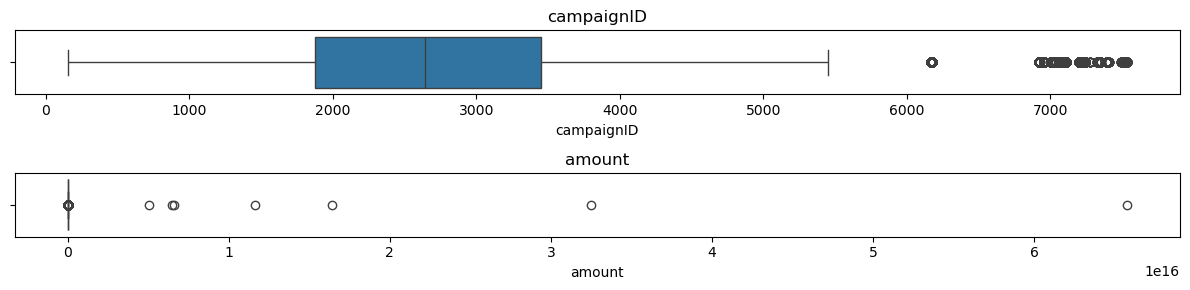

In [2348]:
# Verifying outliers
cols = ['campaignID', 'amount']

fig, ax = plt.subplots(nrows=len(cols), ncols=1, figsize=(12, 3))

for i, col in enumerate(cols):
    sns.boxplot(ax=ax[i], x=gifts[col])
    ax[i].set_title(col)

plt.tight_layout()
plt.show()

In [2349]:
# Winsorizing the results
lower = gifts[cols].quantile(0.01)
upper = gifts[cols].quantile(0.99)

# printing the results
print(lower)
print(upper)

campaignID    850.0
amount         30.0
Name: 0.01, dtype: float64
campaignID     7243.0
amount        12395.0
Name: 0.99, dtype: float64


In [2350]:
# Replace lower and upper values by the value of bottom 1% and top 99% (winsorization)
gifts = gifts.copy()
gifts[cols] = gifts[cols].clip(lower=lower, upper=upper, axis=1)

In [2351]:
gifts.head(2)

,donorID,campaignID,amount,gift_date
1,D100001,1577.0,1239,2007-10-11
2,D100001,1634.0,669,2007-12-28


In [2352]:
gifts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200957 entries, 1 to 216593
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   donorID     200957 non-null  object        
 1   campaignID  200957 non-null  float64       
 2   amount      200957 non-null  int64         
 3   gift_date   200957 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 7.7+ MB


## 4) Selection campaign 6169

### General inspection

In [2353]:
# Displaying the sc6 table
sc6.head()

,donorID
0,D100001
1,D100002
2,D100004
3,D100008
4,D100009


### Missing values

In [2354]:
# Looking for missing values
print('Missing values per column:')
print('---------------------------------')
print(sc6.isna().sum())
print('---------------------------------')
print(f'The data shows {sc6.isna().sum().sum()} missing values')

Missing values per column:
---------------------------------
donorID    0
dtype: int64
---------------------------------
The data shows 0 missing values


## 5) selection campaign 7244

### General inspection

In [2355]:
# Displaying the sc7 table
sc7.head()

,donorID
0,D100001
1,D100002
2,D100008
3,D100009
4,D100010


### Missing values

In [2356]:
# Looking for missing values
print('Missing values per column:')
print('---------------------------------')
print(sc7.isna().sum())
print('---------------------------------')
print(f'The data shows {sc7.isna().sum().sum()} missing values')

Missing values per column:
---------------------------------
donorID    0
dtype: int64
---------------------------------
The data shows 0 missing values


# II/ Dependent variable

In [2357]:
# Setting up the campaign date
campaign_date = rd1

In [2358]:
# Merging gifts and sc6 because gifts contains the donation history of the donors and we want to select those who were selected in the campaign
# We use a left join because we want all the donors from the campaign, even if they never donated to be able to understand why some gave and 
# other did not based on a set of feature engineering that will come afterwards
donors_sc6 = sc6.merge(gifts, on='donorID', how='left')
donors_sc6.head(2)

,donorID,campaignID,amount,gift_date
0,D100001,1577.0,1239.0,2007-10-11
1,D100001,1634.0,669.0,2007-12-28


In [2359]:
# We want to know which donors donated after the campaign 30 euros or more
after_sc6 = donors_sc6[donors_sc6['gift_date'] > campaign_date]
donation_30 = after_sc6[after_sc6['amount'] >= 30]

In [2360]:
# We want the variable to be at the donor level, not the gift one
# Using .unique() is a way to achieve such a granularity
donated_ids = donation_30['donorID'].unique()

In [2361]:
# Setting up the target variable for the train set
basetable = sc6.copy()

basetable['target'] = 0

basetable.loc[basetable['donorID'].isin(donated_ids), 'target'] = 1
basetable.head()

,donorID,target
0,D100001,0
1,D100002,0
2,D100004,0
3,D100008,0
4,D100009,0


In [2362]:
basetable['target'].value_counts()

target
0    32488
1     2400
Name: count, dtype: int64

In [2363]:
basetable.head()

,donorID,target
0,D100001,0
1,D100002,0
2,D100004,0
3,D100008,0
4,D100009,0


# III/ Independent variable + basetable creation

In [2364]:
# Basetable creation
basetable = pd.merge(basetable, donors, on='donorID', how='left')
# we start with the donors table since it presents a lot of information
basetable.head(2)

,donorID,target,zipcode,province,region,gender,language,dateOfBirth
0,D100001,0,1861.0,Flemish Brabant,Flanders,F,NL,1967-12-24
1,D100002,0,2260.0,Antwerp,Flanders,M,NL,1952-01-14


### a) demographic

#### age

In [2365]:
# Computing the age
basetable['age'] = (rd1.year - pd.to_datetime(basetable['dateOfBirth'], errors='coerce').dt.year).astype('Int64')

#### age_group

In [2366]:
# Computing the age group

def age_group(age):
    if age <= 14:
        return 'Children'
    elif age <= 24:
        return 'Youth'
    elif age <= 64:
        return 'Adults'
    else:
        return 'Seniors'

basetable['age_group'] = basetable['age'].apply(age_group)

#### regions

In [2367]:
# Get dummies from the regions
dummies = pd.get_dummies(basetable['region'], prefix='region', dtype=int, drop_first=True)
basetable = pd.concat([basetable, dummies], axis=1)
basetable = basetable.drop(columns=['region'])

#### province

In [2368]:
# Get dummies from the province
dummies = pd.get_dummies(basetable['province'], prefix='province', dtype=int, drop_first=True)
basetable = pd.concat([basetable, dummies], axis=1)
basetable = basetable.drop(columns=['province'])
basetable.head()

,donorID,target,zipcode,gender,language,dateOfBirth,age,age_group,region_Flanders,region_Wallonia,...,province_Brussels,province_East Flanders,province_Flemish Brabant,province_Hainaut,province_Liege,province_Limburg,province_Luxembourg,province_Namur,province_Walloon Brabant,province_West Flanders
0,D100001,0,1861.0,F,NL,1967-12-24,51,Adults,1,0,...,0,0,1,0,0,0,0,0,0,0
1,D100002,0,2260.0,M,NL,1952-01-14,66,Seniors,1,0,...,0,0,0,0,0,0,0,0,0,0
2,D100004,0,1020.0,F,FR,1952-03-29,66,Seniors,0,0,...,1,0,0,0,0,0,0,0,0,0
3,D100008,0,1780.0,M,FR,1937-08-30,81,Seniors,1,0,...,0,0,1,0,0,0,0,0,0,0
4,D100009,0,1020.0,M,FR,1932-01-20,86,Seniors,0,0,...,1,0,0,0,0,0,0,0,0,0


### b) timing (RFM + LOR)

In [2369]:
# Get past gift behavior
past_gifts = gifts.copy()
campaign_date = rd1
past_gifts_6169 = past_gifts[past_gifts['gift_date'] < campaign_date].copy()

In [2370]:
# Aggregate features by donorID
timing_6169 = past_gifts_6169.groupby('donorID').agg({
    'gift_date': ['max', 'min'],  # To calculate Recency and Length of Relationship
    'amount': ['count', 'sum', 'mean', 'max', 'min'] # Frequency and Monetary
})

# Adding a suffix
timing_6169.columns = ['_'.join(col).strip() for col in timing_6169.columns.values]
timing_6169.reset_index(inplace=True)

# Calculating Recency (Days since last gift to campaign date)
timing_6169['recency'] = (rd1 - timing_6169['gift_date_max']).dt.days

# Renaming columns for clarity
timing_6169.rename(columns={
    'amount_count': 'frequency',
    'amount_sum': 'total_amount',
    'amount_mean': 'avg_amount',
    'amount_max': 'max_amount'
}, inplace=True)

timing_6169.head(2)

,donorID,gift_date_max,gift_date_min,frequency,total_amount,avg_amount,max_amount,amount_min,recency
0,D100001,2011-12-30,2007-10-11,11,8510,773.636364,2479,100,2440
1,D100002,2015-01-10,2015-01-10,1,200,200.000000,200,200,1333


In [2371]:
# Adding the length of relationship (LOR)
timing_6169['LOR'] = timing_6169['gift_date_max'] - timing_6169['gift_date_min']

In [2372]:
# Merging within the basetable
basetable = pd.merge(basetable, timing_6169, on='donorID', how='left')
basetable.head()

,donorID,target,zipcode,gender,language,dateOfBirth,age,age_group,region_Flanders,region_Wallonia,...,province_West Flanders,gift_date_max,gift_date_min,frequency,total_amount,avg_amount,max_amount,amount_min,recency,LOR
0,D100001,0,1861.0,F,NL,1967-12-24,51,Adults,1,0,...,0,2011-12-30,2007-10-11,11.0,8510.0,773.636364,2479.0,100.0,2440.0,1541 days
1,D100002,0,2260.0,M,NL,1952-01-14,66,Seniors,1,0,...,0,2015-01-10,2015-01-10,1.0,200.0,200.000000,200.0,200.0,1333.0,0 days
2,D100004,0,1020.0,F,FR,1952-03-29,66,Seniors,0,0,...,0,2011-06-03,2005-07-02,25.0,44843.0,1793.720000,4958.0,300.0,2650.0,2162 days
3,D100008,0,1780.0,M,FR,1937-08-30,81,Seniors,1,0,...,0,2011-10-28,2007-06-21,3.0,7937.0,2645.666667,4958.0,500.0,2503.0,1590 days
4,D100009,0,1020.0,M,FR,1932-01-20,86,Seniors,0,0,...,0,2012-03-25,2006-01-17,19.0,10628.0,559.368421,1239.0,100.0,2354.0,2259 days


### c) campaign-specific

In [2373]:
# We need this to get 'CostUnit' associated with each gift, therefore, we will temporarily merge gifts and campaign data to get it
# Indeed, gift is the only table that can link our basetable with campaign, since it has the campaignID key
gifts_with_costs = pd.merge(gifts, camp, on='campaignID', how='left')

In [2374]:
# Looking at behavior before the campaign we are predicting
history_campaigns = gifts_with_costs[gifts_with_costs['gift_date'] < rd1]

In [2375]:
# Get a donor-level granularity
campaign_features = history_campaigns.groupby('donorID').agg({
    'CostUnit': ['mean', 'min', 'max'],  # How expensive are the campaigns they support? (get an idea of their relative importance)
    'lettersSent': ['mean']   # What is the importance of the campaign they support
})

In [2376]:
# To get more consistent column names
campaign_features.columns = ['_'.join(col).strip() for col in campaign_features.columns.values]
campaign_features.reset_index(inplace=True)

In [2377]:
# Adding the cost per unit range
campaign_features['cost_range'] = campaign_features['CostUnit_max'] - campaign_features['CostUnit_min']
campaign_features.head()

,donorID,CostUnit_mean,CostUnit_min,CostUnit_max,lettersSent_mean,cost_range
0,D100001,0.335455,0.20,0.61,32877.454545,0.41
1,D100002,0.500000,0.50,0.50,37833.000000,0.00
2,D100003,0.196000,0.07,0.30,35984.792000,0.23
3,D100004,0.317200,0.08,0.61,34755.360000,0.53
4,D100005,0.312500,0.20,0.50,35195.750000,0.30


In [2378]:
# Merging with camp database to add some campaign-level information
basetable = pd.merge(basetable, campaign_features, on='donorID', how='left')
basetable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34888 entries, 0 to 34887
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   donorID                   34888 non-null  object         
 1   target                    34888 non-null  int64          
 2   zipcode                   34872 non-null  float64        
 3   gender                    34872 non-null  object         
 4   language                  34872 non-null  object         
 5   dateOfBirth               34872 non-null  datetime64[ns] 
 6   age                       34872 non-null  Int64          
 7   age_group                 34888 non-null  object         
 8   region_Flanders           34888 non-null  int64          
 9   region_Wallonia           34888 non-null  int64          
 10  province_Antwerp          34888 non-null  int64          
 11  province_Brussels         34888 non-null  int64          
 12  prov

# IV/ Data cleaning

## 1) Cleaning columns

In [2379]:
# Dropping
basetatble = basetable.drop(columns=['zipcode'], inplace=True)

In [2380]:
# Setting donorID to index
basetable = basetable.set_index('donorID') # Since we do not need it in the model but it still interesting to be reachable

## 2) Missing values

In [2381]:
# Looking for missing values
print('Missing values per column:')
print('---------------------------------')
print(basetable.isna().sum())
print('---------------------------------')
print(f'The data shows {basetable.isna().sum().sum()} missing values')

Missing values per column:
---------------------------------
target                         0
gender                        16
language                      16
dateOfBirth                   16
age                           16
age_group                      0
region_Flanders                0
region_Wallonia                0
province_Antwerp               0
province_Brussels              0
province_East Flanders         0
province_Flemish Brabant       0
province_Hainaut               0
province_Liege                 0
province_Limburg               0
province_Luxembourg            0
province_Namur                 0
province_Walloon Brabant       0
province_West Flanders         0
gift_date_max               1111
gift_date_min               1111
frequency                   1111
total_amount                1111
avg_amount                  1111
max_amount                  1111
amount_min                  1111
recency                     1111
LOR                         1111
CostUnit_mean  

In [2382]:
# gender by the mode
gender_mode = basetable['gender'].mode()[0]
basetable['gender'] = basetable['gender'].fillna(value=gender_mode)

In [2383]:
# language by the mode as well
language_mode = basetable['language'].mode()[0]
basetable['language'] = basetable['language'].fillna(value=language_mode)

In [2384]:
# Dropping for dateOfBirth and age (likely the same donors since the same number + age computed from birthdate)
basetable = basetable.dropna(subset=['dateOfBirth', 'age'])

In [2385]:
# Inputing by 0 for the others (they likely represent the same clients as well because they are the same number and ad interconnected)
cols = ['gift_date_max', 'gift_date_min', 'frequency', 'total_amount', 'avg_amount', 'max_amount', 'amount_min', 'recency',
        'LOR', 'CostUnit_mean', 'CostUnit_min', 'CostUnit_max', 'lettersSent_mean', 'cost_range']

for col in cols:
        basetable[col] = basetable[col].fillna(value=0)

print(f'There are {basetable.isna().sum().sum()} missing values in the basetable at this stage.')

There are 0 missing values in the basetable at this stage.


## 3) Outliers

In [2386]:
# Finding outliers (using only the numerical columns)
num_cols = basetable.select_dtypes(include=['float', 'int']).columns

In [2387]:
print(num_cols)

Index(['target', 'age', 'region_Flanders', 'region_Wallonia',
       'province_Antwerp', 'province_Brussels', 'province_East Flanders',
       'province_Flemish Brabant', 'province_Hainaut', 'province_Liege',
       'province_Limburg', 'province_Luxembourg', 'province_Namur',
       'province_Walloon Brabant', 'province_West Flanders', 'frequency',
       'total_amount', 'avg_amount', 'max_amount', 'amount_min', 'recency',
       'CostUnit_mean', 'CostUnit_min', 'CostUnit_max', 'lettersSent_mean',
       'cost_range'],
      dtype='object')


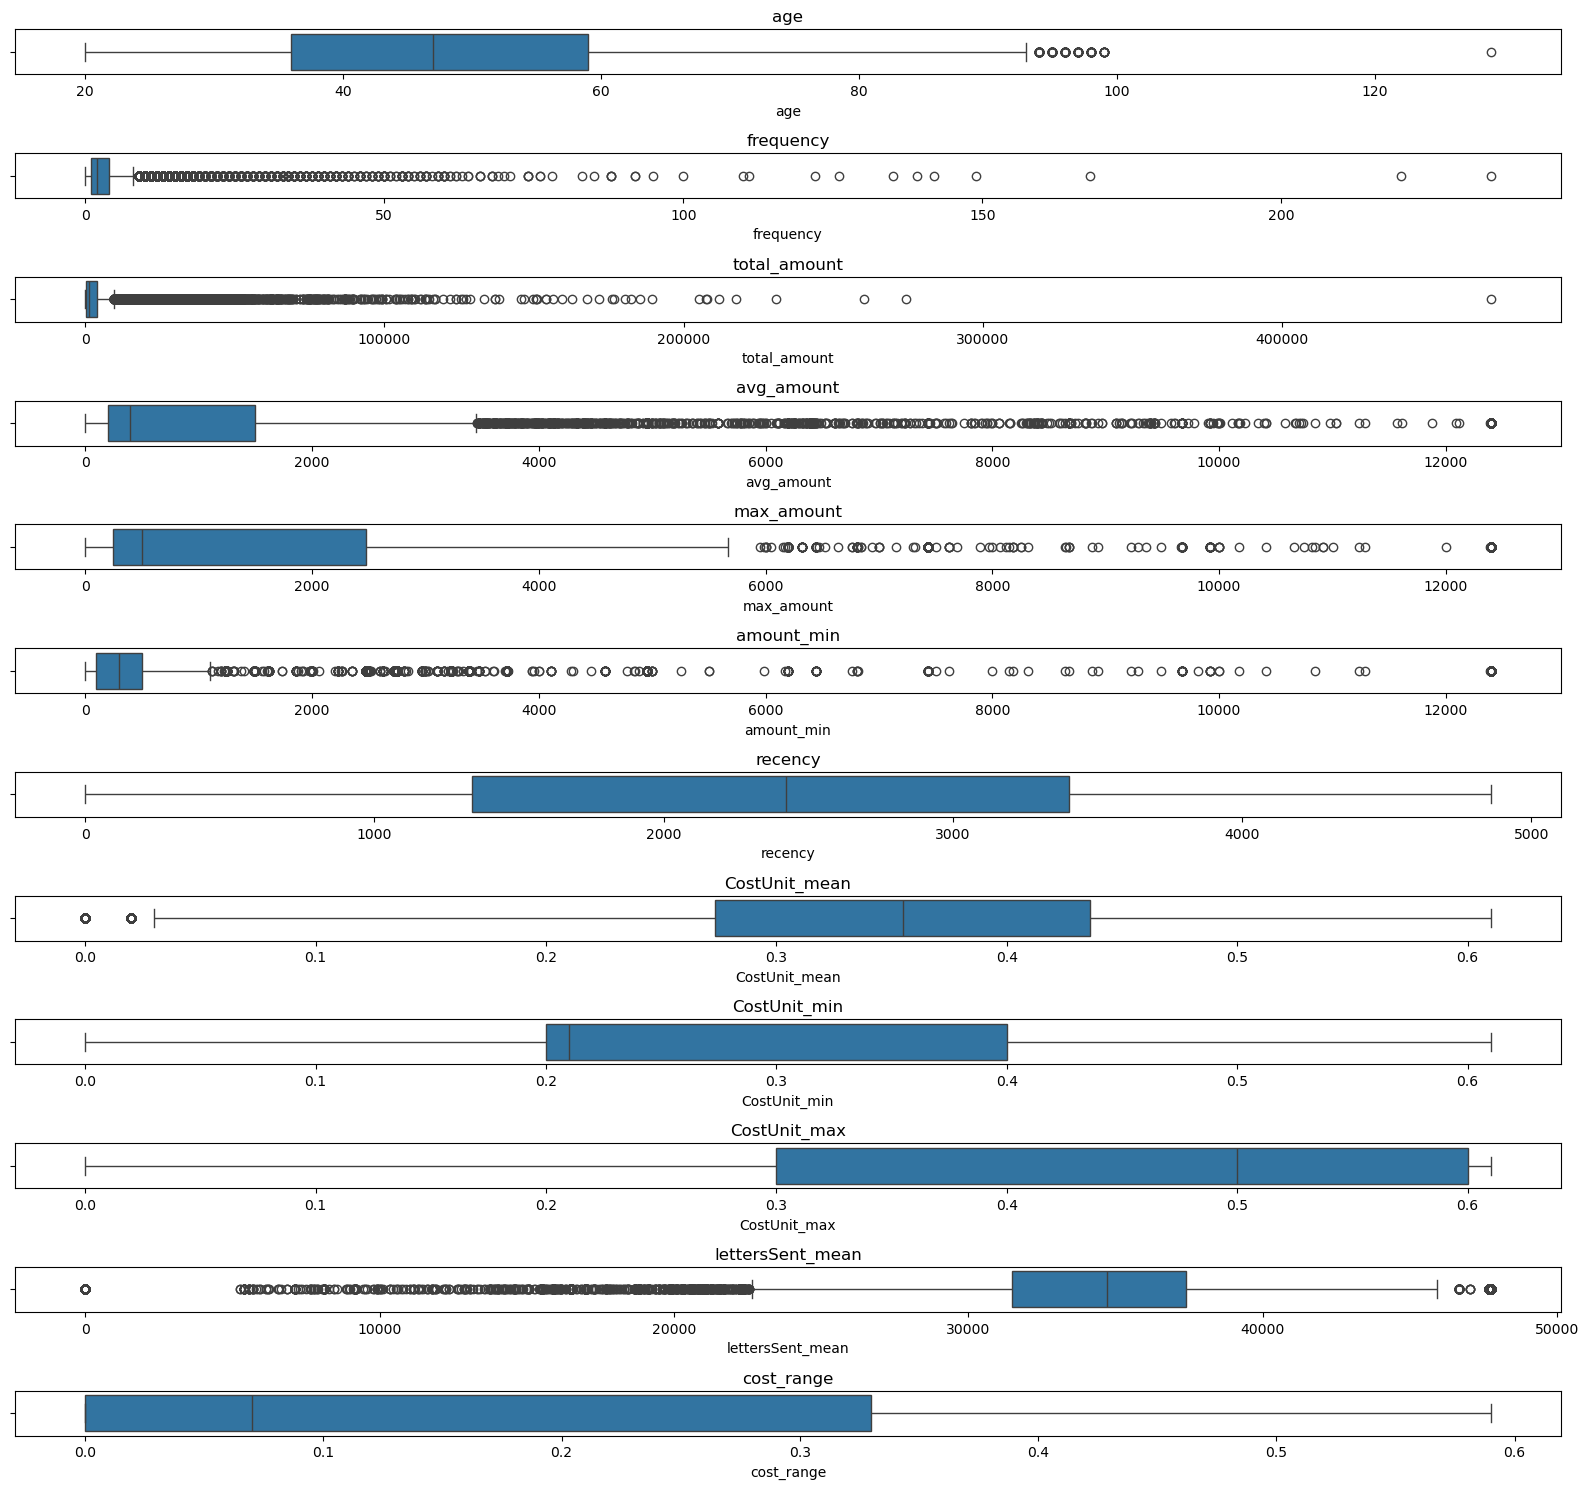

In [2388]:
# Verifying outliers
cols = ['age','frequency',
       'total_amount', 'avg_amount', 'max_amount', 'amount_min', 'recency',
       'CostUnit_mean', 'CostUnit_min', 'CostUnit_max', 'lettersSent_mean',
       'cost_range']

fig, ax = plt.subplots(nrows=len(cols), ncols=1, figsize=(16, 15))

for i, col in enumerate(cols):
    sns.boxplot(ax=ax[i], x=basetable[col])
    ax[i].set_title(col)

plt.tight_layout()
plt.show()

In [2389]:
# Winsorizing the results
lower = basetable[cols].quantile(0.01)
upper = basetable[cols].quantile(0.99)

# printing the results
print(lower)
print(upper)

age                 24.0
frequency            0.0
total_amount         0.0
avg_amount           0.0
max_amount           0.0
amount_min           0.0
recency              0.0
CostUnit_mean        0.0
CostUnit_min         0.0
CostUnit_max         0.0
lettersSent_mean     0.0
cost_range           0.0
Name: 0.01, dtype: Float64
age                      90.0
frequency                30.0
total_amount          50555.0
avg_amount          9333.4625
max_amount            12395.0
amount_min             7437.0
recency                4626.0
CostUnit_mean             0.6
CostUnit_min              0.6
CostUnit_max             0.61
lettersSent_mean     47746.96
cost_range               0.57
Name: 0.99, dtype: Float64


In [2390]:
# Replace lower and upper values by the value of bottom 1% and top 99% (winsorization)
basetable = basetable.copy()
basetable[cols] = basetable[cols].clip(lower=lower, upper=upper, axis=1)